In [1]:
from tensorflow import keras
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [3]:
!nvidia-smi

Sat Jun 27 03:20:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


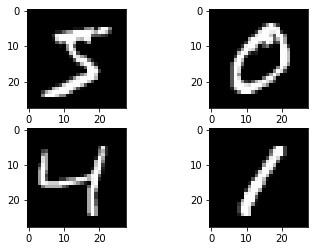

In [5]:
# Plot 4 images as grayscale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [7]:
# Normalize the inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [8]:
# One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
model = Sequential()

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 9s - loss: 0.3814 - accuracy: 0.8837 - val_loss: 0.0805 - val_accuracy: 0.9741
Epoch 2/30
 - 3s - loss: 0.0926 - accuracy: 0.9713 - val_loss: 0.0515 - val_accuracy: 0.9820
Epoch 3/30
 - 3s - loss: 0.0664 - accuracy: 0.9794 - val_loss: 0.0346 - val_accuracy: 0.9879
Epoch 4/30
 - 3s - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0327 - val_accuracy: 0.9899
Epoch 5/30
 - 3s - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0303 - val_accuracy: 0.9903
Epoch 6/30
 - 3s - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0297 - val_accuracy: 0.9896
Epoch 7/30
 - 3s - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0293 - val_accuracy: 0.9899
Epoch 8/30
 - 3s - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0245 - val_accuracy: 0.9911
Epoch 9/30
 - 3s - loss: 0.0289 - accuracy: 0.9902 - val_loss: 0.0245 - val_accuracy: 0.9923
Epoch 10/30
 - 3s - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0256 - val_accuracy: 0.9913
Epoch 11/30
 - 3s -

In [10]:
# Save whole model for download
model.save("model.h5")

In [11]:
pip install -U ipython

     |████████████████████████████████| 788kB 2.5MB/s 
     |████████████████████████████████| 358kB 7.4MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [1]:
!pip install tensorflowjs

  Using cached https://files.pythonhosted.org/packages/4a/b8/16f378a20a2ee7736233574f65a6cf2154cf8965a8890d27f3d2f33595b2/tensorflowjs-2.0.1-py3-none-any.whl
     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 137.3MB 86kB/s 
     |████████████████████████████████| 256kB 43.0MB/s 
     |████████████████████████████████| 921kB 41.7MB/s 
     |████████████████████████████████| 460kB 43.1MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=548dc8e015dc3545b0c0005ef0c8ac9ebba3a1fcb5d3a7a94a2031a2072a08fd
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: ipython 7.16.1 has requirement prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.14 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
ERROR: data

In [2]:
!tensorflowjs_converter --input_format keras /content/model.h5' '/content/model